# TON-IoT Review
________


## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


## Loading dataset

In [2]:
df = pd.read_csv("./datasets/ton-iot.csv")

# Quick look at data
display(df.head())
display(df.info())
display(df.describe())

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,...,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ts                      19 non-null     int64  
 1   src_ip                  19 non-null     object 
 2   src_port                19 non-null     int64  
 3   dst_ip                  19 non-null     object 
 4   dst_port                19 non-null     int64  
 5   proto                   19 non-null     object 
 6   service                 19 non-null     object 
 7   duration                19 non-null     float64
 8   src_bytes               19 non-null     int64  
 9   dst_bytes               19 non-null     int64  
 10  conn_state              19 non-null     object 
 11  missed_bytes            19 non-null     int64  
 12  src_pkts                19 non-null     int64  
 13  src_ip_bytes            19 non-null     int64  
 14  dst_pkts                19 non-null     int6

None

,ts,src_port,dst_port,duration,src_bytes,dst_bytes,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_qclass,dns_qtype,dns_rcode,http_request_body_len,http_response_body_len,http_status_code,label
count,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,1.900000e+01,19.0,19.000000,1.900000e+01,19.000000,19.000000,19.0,19.0,19.0,19.0,19.0,19.0,19.000000
mean,1.555359e+09,45675.684211,11035.631579,4254.844302,9.278168e+04,2.207027e+06,0.0,13274.052632,7.848746e+05,1.210526,90.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.578947
std,1.017285e+06,21878.849741,19094.307934,18475.612457,4.044260e+05,9.620135e+06,0.0,57853.957817,3.420835e+06,1.031662,95.022927,0.0,0.0,0.0,0.0,0.0,0.0,0.507257
min,1.554198e+09,1880.000000,53.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,1.554198e+09,34296.000000,80.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.500000,3.000000e+01,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1.556204e+09,60582.000000,80.000000,0.006237,0.000000e+00,0.000000e+00,0.0,2.000000,1.120000e+02,2.000000,120.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,1.556204e+09,60591.000000,13051.000000,31.626276,0.000000e+00,0.000000e+00,0.0,2.000000,1.120000e+02,2.000000,120.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1.556204e+09,60600.000000,52976.000000,80549.530260,1.762852e+06,4.193322e+07,0.0,252181.000000,1.491116e+07,3.000000,354.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


## Data cleanup

### Drop non-required data

In [3]:
df = df.drop(columns=[
    "service","dns_query", "dns_AA", 
    "dns_RD", "dns_RA", "dns_rejected", 
    "ssl_version", "ssl_cipher", "ssl_resumed", 
    "ssl_established", "ssl_subject", "ssl_issuer", 
    "http_trans_depth", "http_method", "http_uri", 
    "http_version", "http_request_body_len", "http_response_body_len", 
    "http_status_code", "http_user_agent", "http_orig_mime_types", 
    "http_resp_mime_types", "weird_name", "weird_addl", 
    "weird_notice", "type", "dns_qclass",
    "dns_qtype", "dns_rcode", "ts",
    "src_ip", "dst_ip"])

### Drop long connection durations

In [4]:
df = df.drop(index=df[df["duration"] > 1000].index)

### Optimizations

In [5]:
conn_state_unique = list(df["conn_state"].unique())
df["conn_state"] = df["conn_state"].apply(lambda x : conn_state_unique.index(x))

In [6]:
proto_unique = list(df["proto"].unique())
df["proto"] = df["proto"].apply(lambda x : proto_unique.index(x))

In [7]:
df.describe()

,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000
mean,48108.611111,8705.611111,0.833333,16.250637,0.0,16.555556,2.055556,0.0,1.444444,81.222222,1.166667,82.555556,0.611111
std,19691.696665,16637.926727,0.383482,20.756218,0.0,70.239274,1.304843,0.0,1.199128,65.125721,1.043185,90.820587,0.501631
min,1880.000000,53.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37374.000000,80.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.250000,15.000000,0.000000,0.000000,0.000000
50%,60583.000000,80.000000,1.000000,0.003393,0.0,0.000000,3.000000,0.0,1.500000,87.500000,1.500000,90.000000,1.000000
75%,60591.500000,10502.000000,1.000000,31.625005,0.0,0.000000,3.000000,0.0,2.000000,112.000000,2.000000,120.000000,1.000000
max,60600.000000,51782.000000,1.000000,71.344293,0.0,298.000000,4.000000,0.0,4.000000,216.000000,3.000000,354.000000,1.000000


In [8]:
df['total_bytes'] = df['src_ip_bytes'] + df['src_ip_bytes'] + df['src_bytes'] + df['dst_bytes']

In [9]:
df.fillna(0, inplace=True)  # or df.dropna()

In [10]:
X = df.drop('label', axis=1)
y = df['label']

# Select only numeric columns for SMOTE
X_numeric = X.select_dtypes(include=np.number)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_numeric, y)

print("Before:", y.value_counts())
print("After:", pd.Series(y_res).value_counts())

Before: label
1    11
0     7
Name: count, dtype: int64
After: label
0    11
1    11
Name: count, dtype: int64


## Rolling Average, Variance and Skew

In [11]:
# Example for a sliding window of 5 rows
window_size = 3
mean_rolling = df.drop(columns=["src_port", "dst_port", "proto", "label"]).rolling(window=window_size).mean()
var_rolling = df.drop(columns=["src_port", "dst_port", "proto", "label"]).rolling(window=window_size).var()
skew_rolling = df.drop(columns=["src_port", "dst_port", "proto", "label"]).rolling(window=window_size).skew()


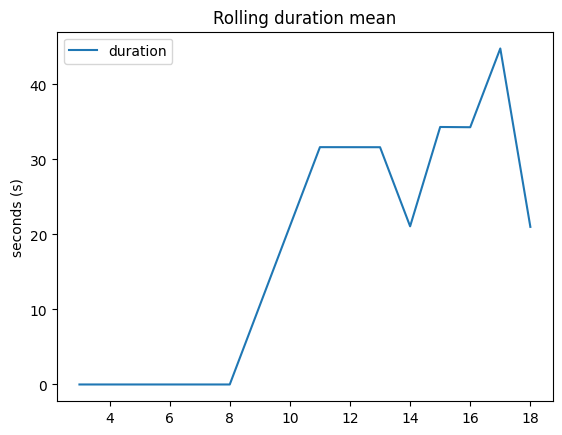

In [12]:
plt.plot(mean_rolling["duration"])
plt.title("Rolling duration mean")
plt.legend(["duration"])
plt.ylabel("seconds (s)")
plt.show()

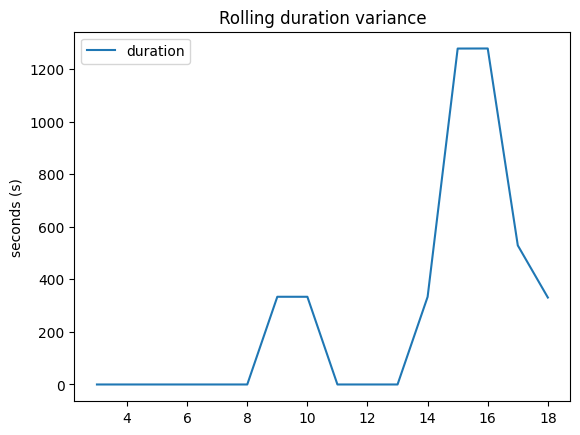

In [13]:
plt.plot(var_rolling["duration"])
plt.title("Rolling duration variance")
plt.legend(["duration"])
plt.ylabel("seconds (s)")
plt.show()

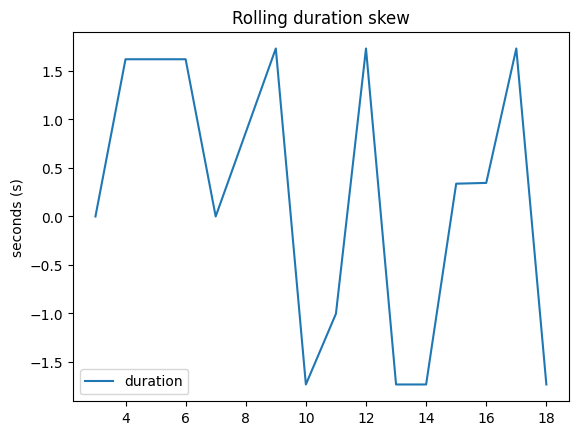

In [14]:
plt.plot(skew_rolling.drop(index=[8])["duration"])
plt.title("Rolling duration skew")
plt.legend(["duration"])
plt.ylabel("seconds (s)")
plt.show()

## FFT magnitude

<function matplotlib.pyplot.show(close=None, block=None)>

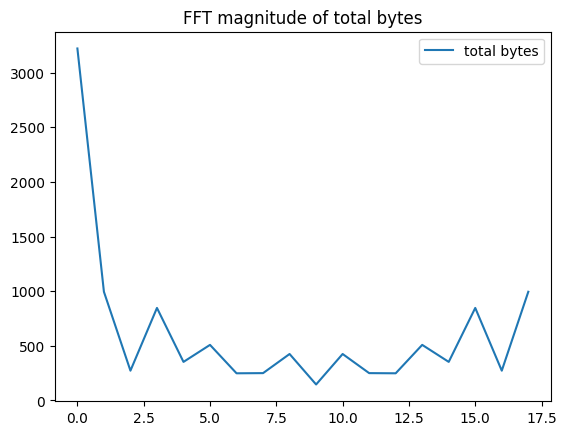

In [15]:
from scipy.fft import fft

# Example: compute FFT magnitude
plt.plot(np.abs(fft(df['total_bytes'].values)))
plt.title("FFT magnitude of total bytes")
plt.legend(["total bytes"])
plt.show

## Transformation and PCA

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_res)

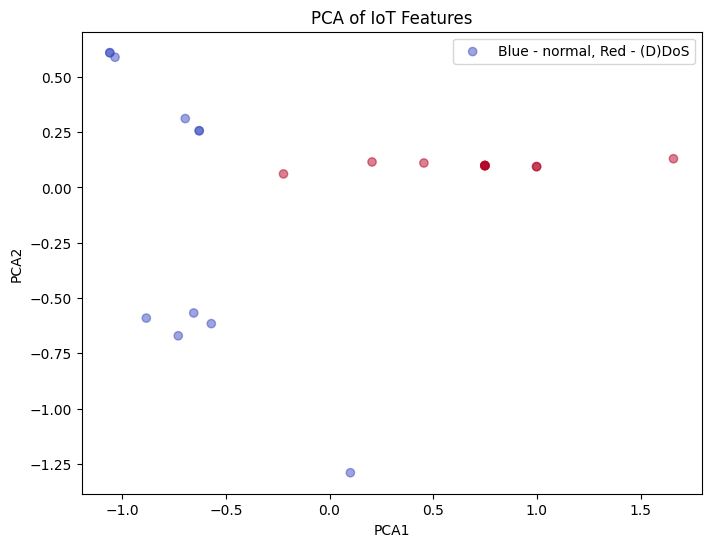

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_res, cmap='coolwarm', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(["Blue - normal, Red - (D)DoS"])
plt.title('PCA of IoT Features')
plt.show()


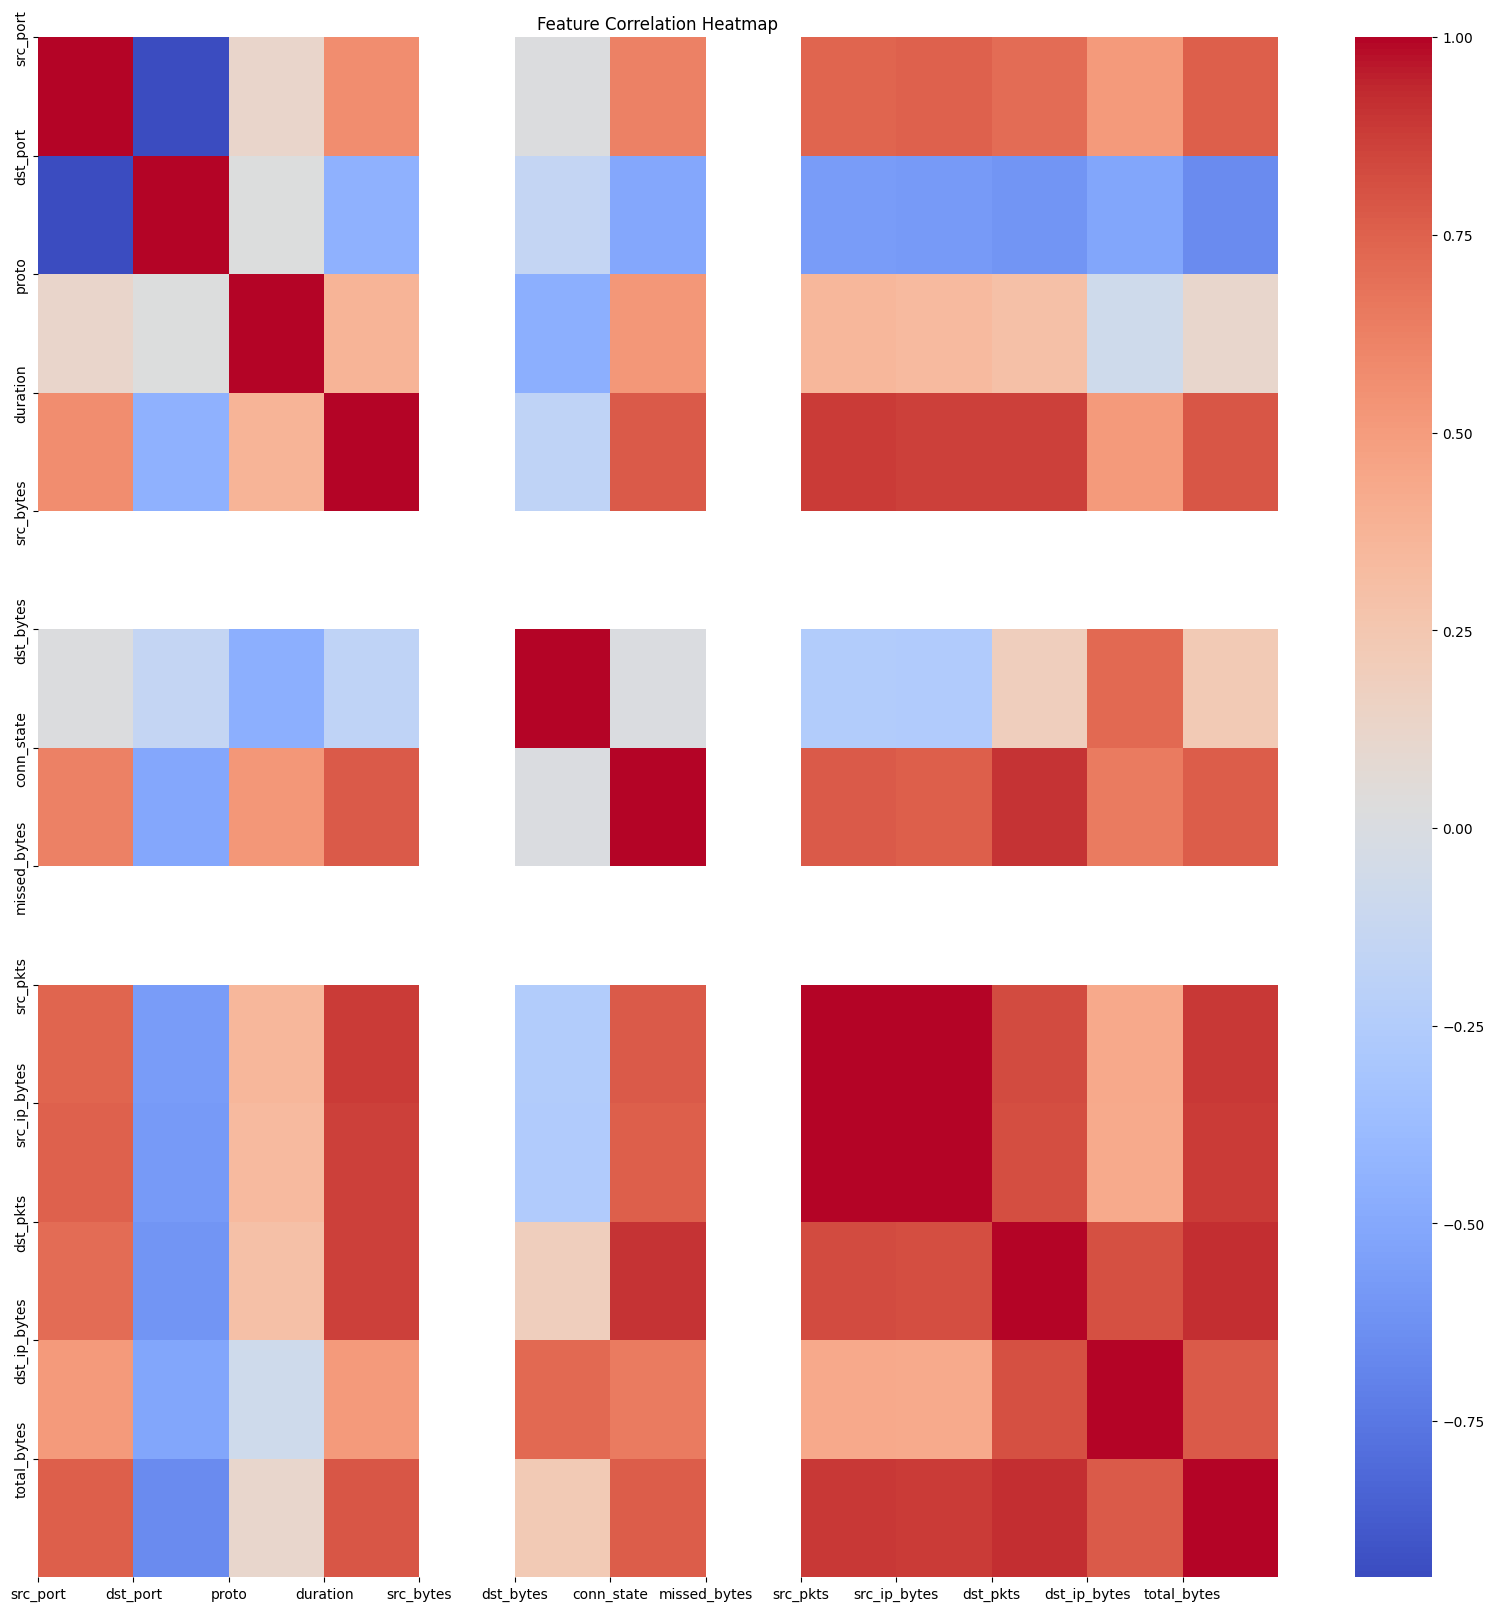

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(X_scaled).corr(), cmap='coolwarm', annot=False)
plt.xticks(list(range(0,len(X_res.columns))),X_res.columns)
plt.yticks(list(range(0,len(X_res.columns))),X_res.columns)
plt.title('Feature Correlation Heatmap')
plt.show()


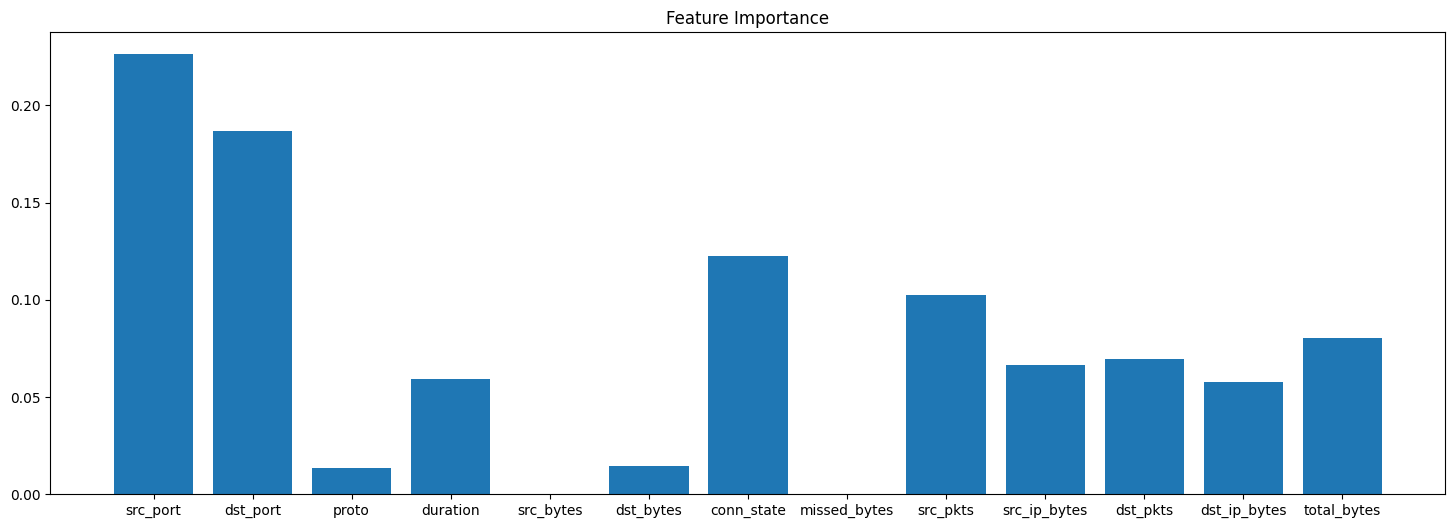

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_scaled, y_res)
importances = rf.feature_importances_

plt.figure(figsize=(18,6))
plt.bar(range(len(importances)), importances)
plt.title('Feature Importance')
plt.xticks(list(range(0,len(X_res.columns))),X_res.columns)
plt.show()


## Feature Engineering

### Before

In [20]:
df.describe()

,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,total_bytes
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,48108.611111,8705.611111,0.833333,16.250637,0.0,16.555556,2.055556,0.0,1.444444,81.222222,1.166667,82.555556,0.611111,179.000000
std,19691.696665,16637.926727,0.383482,20.756218,0.0,70.239274,1.304843,0.0,1.199128,65.125721,1.043185,90.820587,0.501631,127.294471
min,1880.000000,53.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37374.000000,80.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.250000,15.000000,0.000000,0.000000,0.000000,120.000000
50%,60583.000000,80.000000,1.000000,0.003393,0.0,0.000000,3.000000,0.0,1.500000,87.500000,1.500000,90.000000,1.000000,224.000000
75%,60591.500000,10502.000000,1.000000,31.625005,0.0,0.000000,3.000000,0.0,2.000000,112.000000,2.000000,120.000000,1.000000,224.000000
max,60600.000000,51782.000000,1.000000,71.344293,0.0,298.000000,4.000000,0.0,4.000000,216.000000,3.000000,354.000000,1.000000,432.000000


### After

In [21]:
after = pd.DataFrame(X_scaled)
after.columns = X_res.columns
after.describe()

,src_port,dst_port,proto,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,total_bytes
count,22.000000,22.000000,22.000000,2.200000e+01,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.718332,0.212572,0.772727,1.863636e-01,0.0,0.052471,0.454545,0.0,0.295455,0.309343,0.318182,0.197869,0.345539
std,0.350396,0.335199,0.428932,2.767744e-01,0.0,0.214171,0.324004,0.0,0.305080,0.307579,0.348501,0.245016,0.304912
min,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.550281,0.000522,1.000000,0.000000e+00,0.0,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.009259
50%,0.886035,0.000522,1.000000,6.143045e-07,0.0,0.000000,0.375000,0.0,0.250000,0.284722,0.166667,0.162429,0.291667
75%,0.999821,0.279205,1.000000,4.428743e-01,0.0,0.000000,0.750000,0.0,0.500000,0.518519,0.666667,0.338983,0.518519
max,1.000000,1.000000,1.000000,1.000000e+00,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_engineered = pd.DataFrame(X_scaled, columns=X_numeric.columns)
df_engineered['label'] = y_res
df_engineered.to_csv("IoT_features_engineered.csv", index=False)